In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import json

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

params = json.loads(open('../params.json', 'r').read())

# Date range
start = "2022-02-06"
end = "2024-02-06"

# Tickers of assets
industry_asset = json.loads(open('../stocks.json', 'r').read())
assets = []
for key, values in industry_asset.items():
    for value in values:
        assets.append(value)

# Downloading data
data = yf.download(assets, start = start, end = end)

data = data.loc[:,('Adj Close', slice(None))]

data.columns = assets


[*********************100%%**********************]  23 of 23 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,TIMS3.SA,VIVT3.SA,SUZB3.SA,KLBN11.SA,CSAN3.SA,VBBR3.SA,PRIO3.SA,UGPA3.SA,ENAT3.SA,PETR3.SA,...,ALUP11.SA,CPFE3.SA,CMIG3.SA,ELET3.SA,EQTL3.SA,EGIE3.SA,VALE3.SA,GGBR3.SA,CSNA3.SA,FESA4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-08,-0.9138%,-0.1163%,0.3521%,-1.6415%,1.3469%,-0.4718%,-0.9265%,-2.1073%,-0.8053%,-1.0000%,...,0.8800%,-1.4374%,-1.2412%,-0.1486%,-0.6600%,2.1260%,0.7829%,1.3980%,-0.4950%,0.3259%
2022-02-09,-0.1203%,0.5242%,0.7719%,0.8570%,1.2213%,1.0479%,2.5339%,1.6960%,-0.9511%,1.0101%,...,-1.1499%,0.0858%,2.6393%,0.2316%,0.5581%,5.0558%,1.2712%,0.0219%,2.9399%,2.7203%
2022-02-10,0.9233%,0.2897%,-0.4526%,-0.1789%,0.1065%,-0.3457%,0.0000%,2.0526%,0.8665%,-0.1250%,...,-1.0429%,1.7143%,1.0204%,-3.6964%,0.1321%,-1.2031%,1.1855%,2.6912%,0.3515%,-2.0158%
2022-02-11,-1.1535%,-1.2709%,0.9094%,-0.2240%,-1.4179%,0.3716%,-1.9418%,3.1427%,-0.7894%,-0.7926%,...,-3.1212%,4.4944%,4.2424%,-1.0966%,-0.8182%,-0.4298%,0.1378%,-2.0241%,0.0438%,0.5244%
2022-02-14,0.4427%,-2.0480%,0.9705%,0.0000%,-0.2517%,0.0247%,0.2700%,-0.3656%,1.5914%,0.3785%,...,0.1255%,-2.5806%,2.7132%,1.1088%,-0.2129%,-0.1439%,0.6194%,-0.4349%,0.9628%,-0.0200%


In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_covs = ['hist', 'ledoit', 'oas', 'shrunk', 'gl', 'ewma1',
               'ewma2','jlogo', 'fixed', 'spectral', 'shrink',
               'gerber1', 'gerber2']

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_s = pd.DataFrame([])

for i in method_covs:
    port.assets_stats(method_mu=method_mu, method_cov=i, d=0.94)
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = method_covs

You must convert self.cov to a positive definite matrix


In [4]:
display(w_s.style.format("{:.2%}").background_gradient(cmap='YlGn'))

,hist,ledoit,oas,shrunk,gl,ewma1,ewma2,jlogo,fixed,spectral,shrink,gerber1,gerber2
TIMS3.SA,9.28%,9.90%,9.77%,10.07%,9.96%,0.00%,0.00%,7.42%,9.79%,0.00%,9.06%,9.22%,8.09%
VIVT3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,5.48%,5.48%,3.26%,0.00%,0.00%,0.00%,0.98%,0.00%
SUZB3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.70%,0.00%
KLBN11.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CSAN3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
VBBR3.SA,13.64%,13.72%,13.75%,12.89%,14.82%,0.00%,0.00%,9.32%,15.48%,0.00%,12.53%,13.33%,13.66%
PRIO3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
UGPA3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.49%,0.00%,0.00%,0.72%,0.00%,0.00%
ENAT3.SA,0.00%,0.00%,0.00%,0.04%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
PETR3.SA,0.00%,0.12%,0.00%,2.26%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.73%,0.00%


<Axes: >

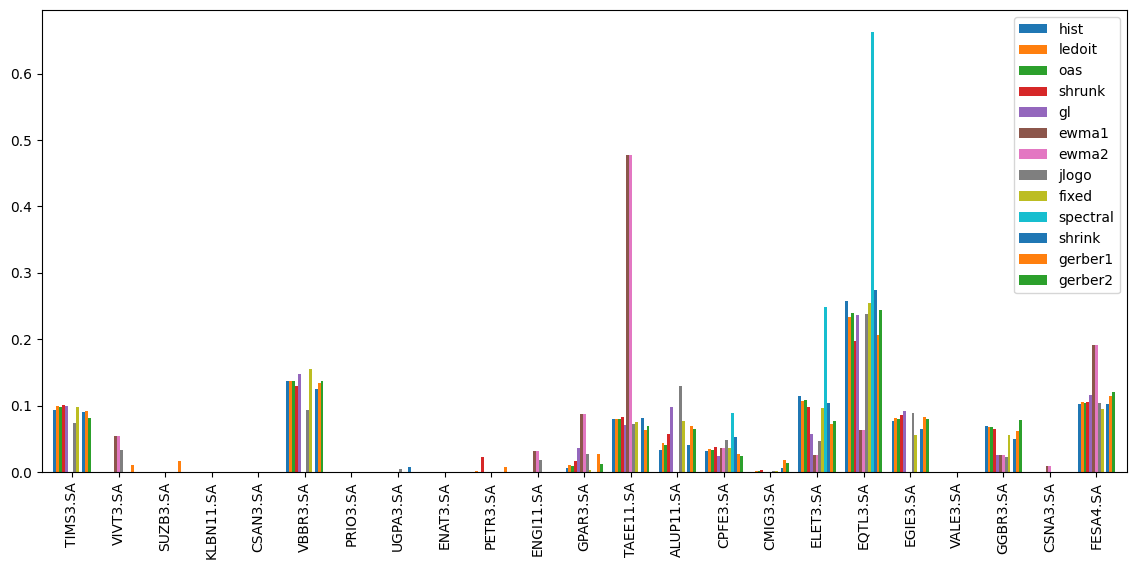

In [5]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio
fig, ax = plt.subplots(figsize=(14,6))

w_s.plot.bar(ax=ax, width=0.8)

In [6]:
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe

w_s = pd.DataFrame([])

for i in method_covs:
    port.assets_stats(method_mu=method_mu, method_cov=i, d=0.94)
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = method_covs

You must convert self.cov to a positive definite matrix


In [7]:
display(w_s.style.format("{:.2%}").background_gradient(cmap='YlGn'))

,hist,ledoit,oas,shrunk,gl,ewma1,ewma2,jlogo,fixed,spectral,shrink,gerber1,gerber2
TIMS3.SA,1.09%,1.78%,1.60%,2.73%,7.35%,0.00%,0.00%,2.53%,0.00%,0.00%,0.00%,5.96%,2.44%
VIVT3.SA,0.92%,1.33%,1.22%,2.06%,0.69%,4.22%,4.22%,6.15%,0.00%,0.00%,0.00%,3.22%,2.17%
SUZB3.SA,0.35%,1.23%,1.00%,2.55%,6.38%,0.00%,0.00%,3.72%,4.92%,0.00%,2.95%,7.49%,5.18%
KLBN11.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CSAN3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
VBBR3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
PRIO3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
UGPA3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ENAT3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
PETR3.SA,14.21%,13.07%,13.36%,11.50%,8.57%,0.00%,0.00%,1.78%,7.98%,0.00%,5.21%,8.80%,7.74%


<Axes: >

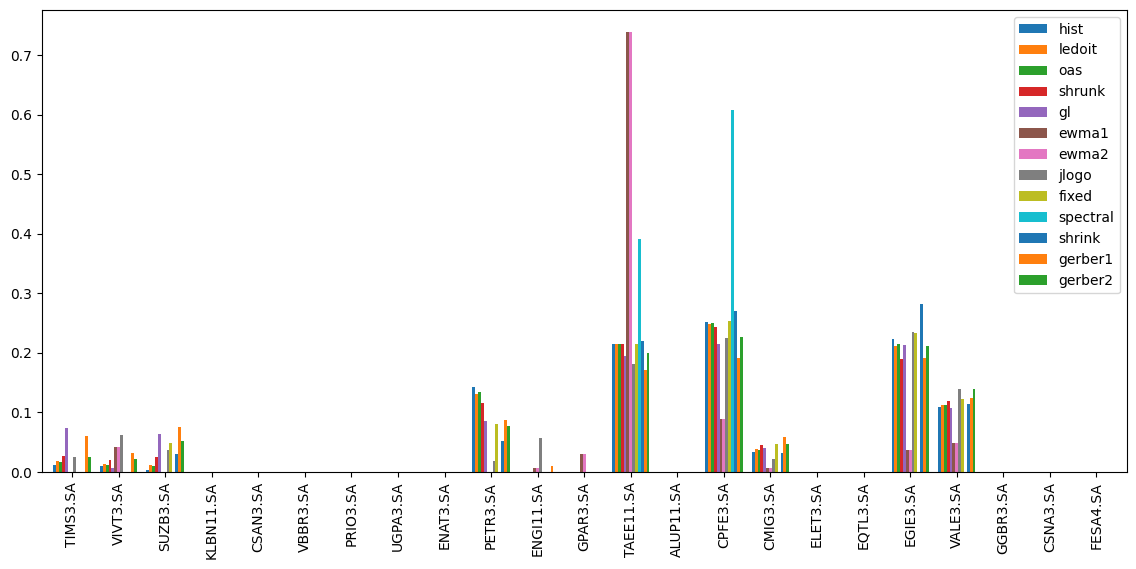

In [8]:
# Plotting a comparison of assets weights for each portfolio
ax, fig = plt.subplots(figsize=(14,6))

w_s.plot.bar(ax=fig, width=0.8)